In [1]:
from art_skills.wSL_trajectory_generator import TrajectoryGenerator
from art_skills.wSL_trajectory_generator import SL_TG
from art_skills.wSL_stroke_generator import StrokeGenerator
import numpy as np
import matplotlib.pyplot as plt
# py.offline.init_notebook_mode(connected=True)


In [2]:
# wSL
parameters = {"dt": 0.01, 
              "t_points": np.array([[0,0], [50, 0]]).T,
              "delta": np.array([0.0]),
              "Ac": np.array([0.05]),
              "delta_t": np.array([0.0]), 
              "T": 0.5}

strokegen = StrokeGenerator()
wsl_sigma = strokegen.sigma(parameters["Ac"])
wsl_mu = strokegen.mu(wsl_sigma, parameters["T"])
wsl_t0, wsl_t = strokegen.t0_t(parameters["dt"], wsl_sigma, wsl_mu, parameters["T"], parameters["delta_t"])

trajectory_generator = TrajectoryGenerator(**parameters)
wsl_trajectory, wsl_strokes = trajectory_generator.generate_trajectory()
maxima = trajectory_generator.extract_strokes()

#print(trajectory)

#print(maxima)

velocity = trajectory_generator.velocity()
#SL = np.multiply(velocity[0:5], 1/D[0][0])
#print(SL)

In [3]:
# SL
p0 = np.array([[-0.000127670365896, -4.43650781626e-15], [-0.000127670365896 + 49.9993834018, -4.43650781626e-15]])
dt = 0.01
t0 = np.array([-0.172941819298])
D = np.array([49.9993834018])
th1 = -9.59385979009e-16
th2 = 1.41346260438e-15
theta = np.array([0])
sigma = np.array([0.226449091217])
mu = np.array([-1.07548267662])
TG = SL_TG(p0, dt, t0, D, th1, th2, theta, sigma, mu)
trajectory, strokes, t = TG.generate_trajectory()


Text(0, 0.5, 'speed')

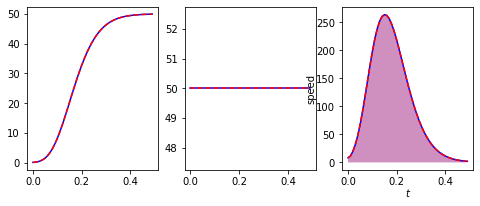

In [8]:
fig1 = plt.figure(figsize=(8,3))
plt.subplot(131)
#plt.scatter(t_points[0,:], t_points[1,:], c='k')
plt.plot(wsl_t, wsl_trajectory[0,:], 'b')
plt.plot(t, wsl_trajectory[0,:], 'r--')
plt.xlabel('$t$', labelpad=0)

plt.subplot(132)
plt.plot(wsl_t, trajectory[1,:], 'b')
plt.plot(t, trajectory[1,:], 'r--')
plt.xlabel('$t$', labelpad=0)

plt.subplot(133)
for i, s in enumerate(wsl_strokes):
    plt.fill_between(wsl_t, 0, s, where=s>0, facecolor='b', alpha=0.25)
plt.plot(wsl_t, velocity, 'b')

for i, s in enumerate(strokes):
    plt.fill_between(t, 0, s, where=s>0, facecolor='r', alpha=0.25)
plt.plot(t, velocity, 'r--')
plt.xlabel('$t$', labelpad=0)